# Section3 GLM ポアソン回帰

# 3.1 例題：個体毎に平均種子数が異なる場合

- 個体id: i
- 施肥処理 fi {C:肥料なし, T:肥料あり}
- 種子数 y_i
- 体サイズ x_i

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


p = "../data/02_processed/ch03/data3a.csv"

df = pd.read_csv(p)

df

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
...,...,...,...
95,8,9.15,T
96,6,8.52,T
97,8,10.24,T
98,7,10.86,T


# 3.2 観察されたデータの概要を調べる

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       100 non-null    int64  
 1   x       100 non-null    float64
 2   f       100 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [3]:
df.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


In [4]:
df["f"].value_counts()

f
C    50
T    50
Name: count, dtype: int64

# 3.3 統計モデリングの前にデータを図示する

<Axes: >

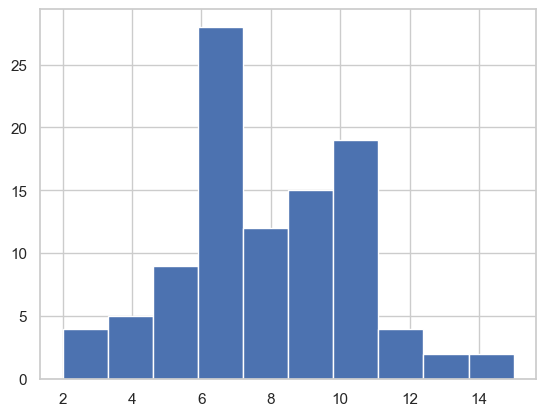

In [5]:
df["y"].hist()

<Axes: >

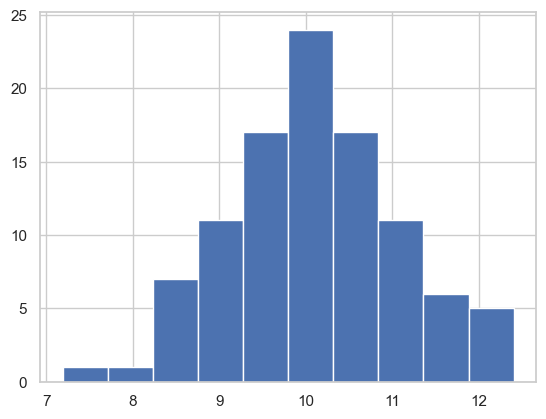

In [6]:
df["x"].hist()

<Axes: >

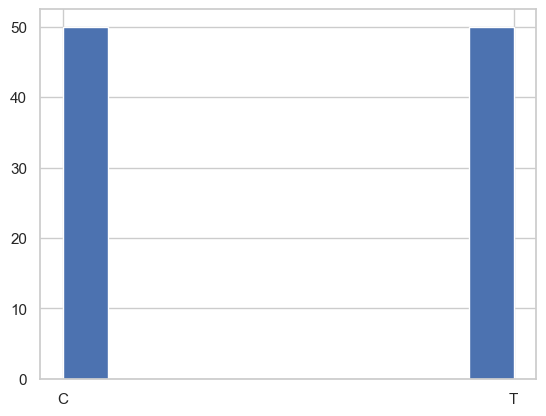

In [7]:
df["f"].hist()

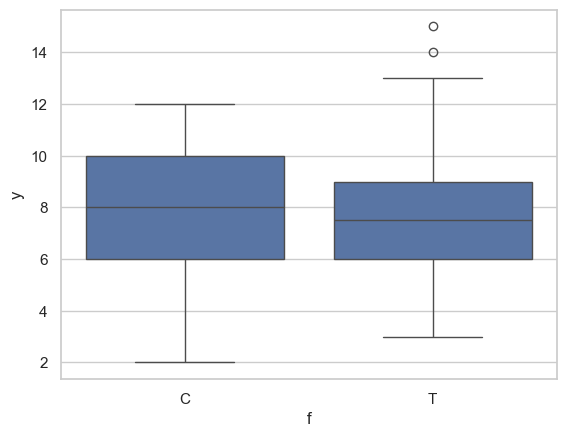

In [8]:
ax = sns.boxplot(data=df, x="f", y="y")


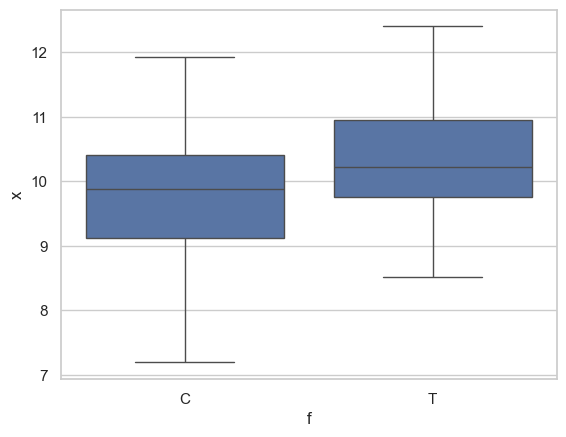

In [9]:
ax = sns.boxplot(data=df, x="f", y="x")


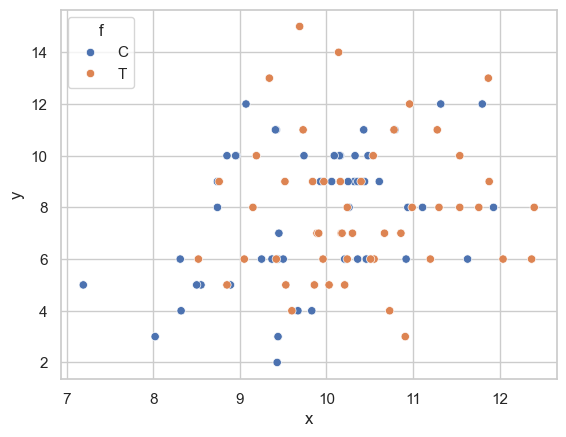

In [10]:
ax = sns.scatterplot(data=df, x="x", y="y", hue="f")


# 3.4 ポアソン回帰の統計モデル

# 3.4.1 線形予測子と対数リンク間数


- y_i ~ poisson(lamda_i)と仮定する.
- lamda_i = exp(beta_1 + beta_2 * x_i) # lamdaはnon-negativeなので、expしてそう
- log_lamda_i = beta_1 + beta_2 * x_i

- 名称
    - Linear Predictor 線形予測子 : (beta_1 + beta_2 * x_i)
    - Link Function リンク関数 : (lam_iの間数) = (線形予測子)
    - Log link function 対数リンク関数 : Log(lam_i) = (線形予測し)

# 3.4.2 あてはめとあてはまりのよさ

- logL(beta1, beta2) = sum_i log ( lam_i ** y_i * exp(-lam_i) / frac(y_i) )
    - sum_i { log(lam_i ** y_i) + (-lam_i) - log frac(y_i) }

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# フォーミュラ記法（オフセットありの例）
model = smf.glm(
    formula="y ~ x",
    data=df,
    family=sm.families.Poisson(sm.families.links.log()),
    # offset=np.log(df["exposure"])  # 露出なしなら削除
)
result = model.fit()

print(result.summary())            # 係数・SE・p値など
pred = result.predict(df)          # 予測（期待値）

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Wed, 10 Sep 2025   Deviance:                       84.993
Time:                        20:19:54   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04414
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.0

/Users/macmini2023/Documents/intro-statistical-modeling-data-analysis/.venv/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [12]:
# 3.4.3 ポアソン回帰モデルによる予測

<Axes: xlabel='x', ylabel='y'>

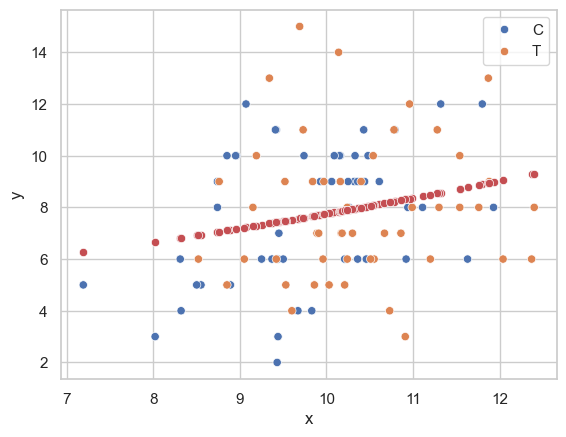

In [13]:
sns.scatterplot(data=df, x="x", y="y",  color="C0", hue="f")
sns.scatterplot(x=df["x"], y=pred, color="C3")

# 3.5 説明変数が因子型の統計モデル

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Wed, 10 Sep 2025   Deviance:                       89.475
Time:                        20:19:54   Pearson chi2:                     87.1
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0003192
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.0

/Users/macmini2023/Documents/intro-statistical-modeling-data-analysis/.venv/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

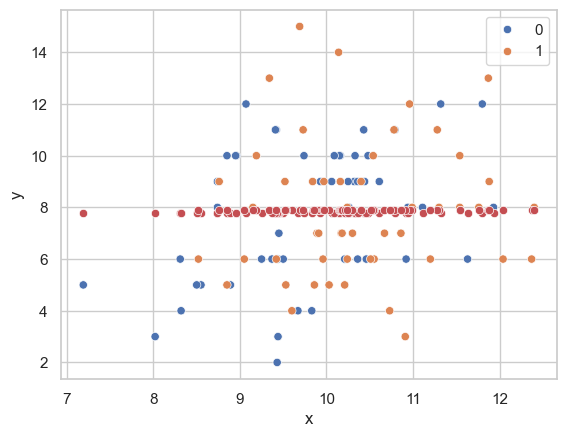

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv(p)

df["f"] = df["f"].map({"C":0, "T":1})

# フォーミュラ記法（オフセットありの例）
model = smf.glm(
    formula="y ~ f",
    data=df,
    family=sm.families.Poisson(sm.families.links.log()),
    # offset=np.log(df["exposure"])  # 露出なしなら削除
)
result = model.fit()

print(result.summary())            # 係数・SE・p値など
pred = result.predict(df)          # 予測（期待値）


sns.scatterplot(data=df, x="x", y="y",  color="C0", hue="f")
sns.scatterplot(x=df["x"], y=pred, color="C3")

In [15]:
# 3.6 説明変数が数量型+因子型の統計モデル

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Wed, 10 Sep 2025   Deviance:                       84.808
Time:                        20:19:54   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04590
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.0

/Users/macmini2023/Documents/intro-statistical-modeling-data-analysis/.venv/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

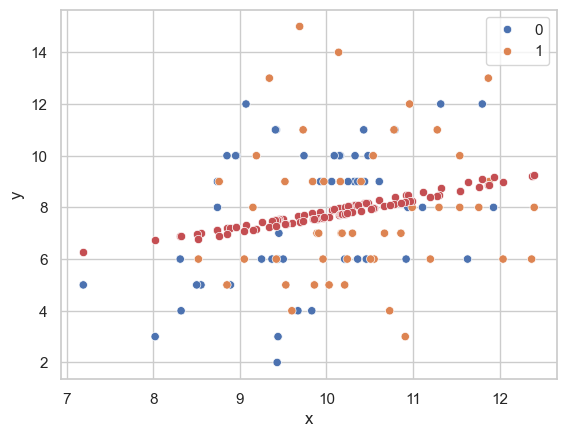

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv(p)

df["f"] = df["f"].map({"C":0, "T":1})

# フォーミュラ記法（オフセットありの例）
model = smf.glm(
    formula="y ~ x + f",
    data=df,
    family=sm.families.Poisson(sm.families.links.log()),
    # offset=np.log(df["exposure"])  # 露出なしなら削除
)
result = model.fit()

print(result.summary())            # 係数・SE・p値など
pred = result.predict(df)          # 予測（期待値）


sns.scatterplot(data=df, x="x", y="y",  color="C0", hue="f")
sns.scatterplot(x=df["x"], y=pred, color="C3")

In [17]:
# 3.6.1 対数リンク関数のわかりやすさ : 掛け算される効果

In [23]:
import numpy as np
b1, b2, b3 = 1.2631, 0.0801, -0.032
# lam_i = np.exp(b1 + b2*x_i)
# lam_i = np.exp(b1 + b2*x_i + b3)
# lam_i = exp(b1) * exp(b2*x_i) * exp(b3)

In [27]:
x_i = 10
lam_i_C = np.exp(b1 + b2*x_i)
lam_i_T = np.exp(b1 + b2*x_i + b3)
print(lam_i_C, lam_i_T)

x_i = 10+1
lam_i_C = np.exp(b1 + b2*x_i)
lam_i_T = np.exp(b1 + b2*x_i + b3)
print(lam_i_C, lam_i_T)


7.878204322134811 7.630092740952347
8.535210337028676 8.266407390842678


In [28]:
np.exp(b3)

np.float64(0.9685065820791976)

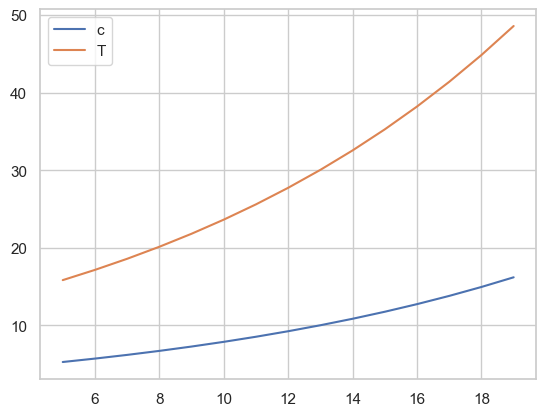

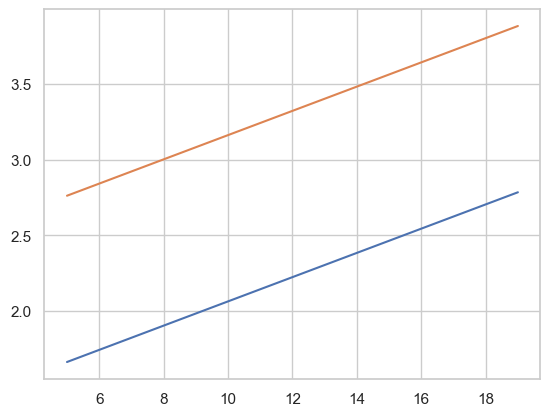


対数リンク関数は、要員の効果が積で表現される. (lam = exp(b1)*exp(b2*x)*exp(b3))は、掛け算になり、xが大きいほど効果が大きい
恒等リンク関数は、(=リンク関数が恒等写像)の時、(lam = b1 + b2*x +b3)は、CとTの違いは定数になる



In [41]:
x = np.arange(5, 20)

_b3 = np.log(3)

lam_i_C = np.exp(b1 + b2*x)
lam_i_T = np.exp(b1 + b2*x + _b3)
plt.plot(x, lam_i_C, label="c")
plt.plot(x, lam_i_T, label="T")
plt.legend()
plt.show()

lam_i_C = (b1 + b2*x)
lam_i_T = (b1 + b2*x + _b3)

plt.plot(x, lam_i_C)
plt.plot(x, lam_i_T)
plt.show()

com="""
対数リンク関数は、要員の効果が積で表現される. (lam = exp(b1)*exp(b2*x)*exp(b3))は、掛け算になり、xが大きいほど効果が大きい
恒等リンク関数は、(=リンク関数が恒等写像)の時、(lam = b1 + b2*x +b3)は、CとTの違いは定数になる
"""
print(com)

# 3.7 なんでも席分布、　なんでも直線には無理がある

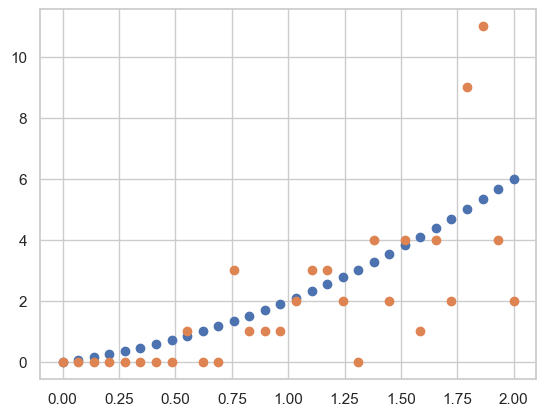

In [ ]:
# 人工データの生成

N=30
x = np.linspace(0, 2, N)
b1, b2, b3 = 0, 1, 1

# xに依存した「平均値」. 
# lam = np.exp(b1 + b2*x)
# lam = np.exp(b1 + b2*x + b3*x*x)
lam = (b1 + b2*x + b3*x*x)

# make 乱数
rng = np.random.default_rng(404)
y = rng.poisson(lam)

# visualize
plt.scatter(x, lam)
plt.scatter(x, y)



                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45.109
Date:                Wed, 10 Sep 2025   Deviance:                       36.807
Time:                        20:57:06   Pearson chi2:                     33.7
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8131
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5806      0.455     -3.475      0.0

/Users/macmini2023/Documents/intro-statistical-modeling-data-analysis/.venv/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

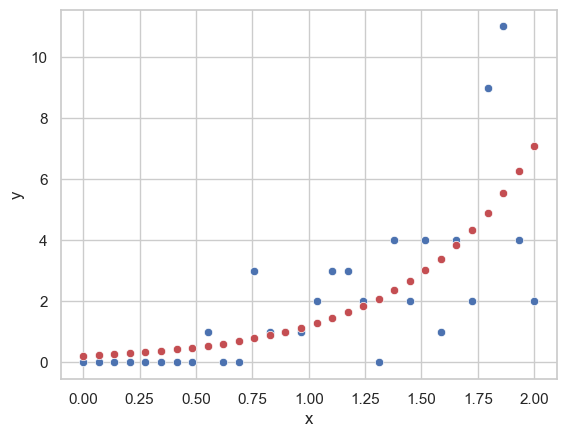

In [172]:
df = pd.DataFrame({
    "x":x,
    "y":y
})

import statsmodels.api as sm
import statsmodels.formula.api as smf

# pisson分布・対数リンク関数
model = smf.glm(
    formula="y ~ x",
    data=df,
    family=sm.families.Poisson(sm.families.links.log()),
)
result = model.fit()

print(result.summary())            # 係数・SE・p値など
pred = result.predict(df)          # 予測（期待値）


sns.scatterplot(data=df, x="x", y="y",  color="C0")
sns.scatterplot(x=df["x"], y=pred, color="C3")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          3.7817
Method:                          IRLS   Log-Likelihood:                -61.486
Date:                Wed, 10 Sep 2025   Deviance:                       105.89
Time:                        20:57:07   Pearson chi2:                     106.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5570
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9355      0.693     -1.351      0.1

/Users/macmini2023/Documents/intro-statistical-modeling-data-analysis/.venv/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

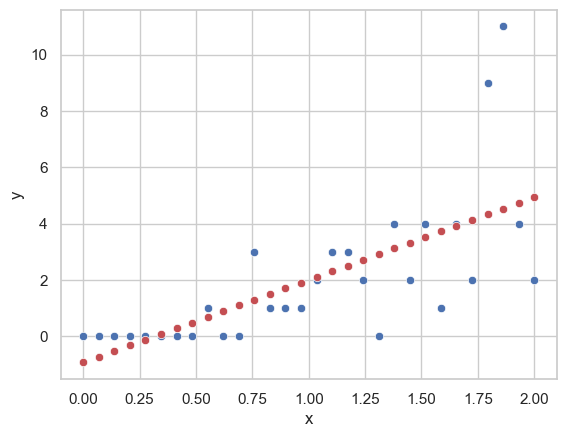

In [173]:
df = pd.DataFrame({
    "x":x,
    "y":y
})

# 正規分布・恒等リンク関数
model = smf.glm(
    formula="y ~ x",
    data=df,
    family=sm.families.Gaussian(sm.families.links.identity()),
)
result = model.fit()

print(result.summary())            # 係数・SE・p値など
pred = result.predict(df)          # 予測（期待値）


sns.scatterplot(data=df, x="x", y="y",  color="C0")
sns.scatterplot(x=df["x"], y=pred, color="C3")